In [50]:
import os,codecs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# source for extracting mnist data - 
# https://github.com/Ghosh4AI/Data-Processors/blob/master/MNIST/MNIST_Loader.ipynb

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

def read_data():
    datapath = 'mnist/'
    files = os.listdir(datapath)
    data_dict = {}
    for file in files:
        if file.endswith('ubyte'):
            print('Reading ',file)
            with open (datapath+file,'rb') as f:
                data = f.read()
                type = get_int(data[:4])
                length = get_int(data[4:8])
                if (type == 2051):
                    category = 'images'
                    num_rows = get_int(data[8:12])
                    num_cols = get_int(data[12:16])
                    parsed = np.frombuffer(data,dtype = np.uint8, offset = 16) 
                    parsed = parsed.reshape(length,num_rows,num_cols)          
                elif(type == 2049):
                    category = 'labels'
                    parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
                    parsed = parsed.reshape(length)                      
                if (length==10000):
                    set = 'test'
                elif (length==60000):
                    set = 'train'
                data_dict[set+'_'+category] = parsed
    return data_dict
data_dict = read_data()

Reading  t10k-images.idx3-ubyte
Reading  t10k-labels.idx1-ubyte
Reading  train-images.idx3-ubyte
Reading  train-labels.idx1-ubyte


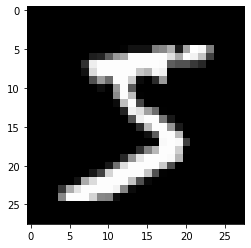

In [70]:
X = data_dict["train_images"].reshape(60000,784)
Y = data_dict["train_labels"]
M = 5
learning_rate = 0.1
regressors = []
for i in range(M):
    regressor = DecisionTreeRegressor(max_depth = 1)
    regressor.fit(X, Y)
    regressors.append(regressor)
    Ytemp = regressor.predict(X)
    if (i == 0):
        Y = Y - Ytemp
    else:
        Y = Y - (learning_rate*Ytemp)
#     print(Y)

7.12% accuracy in iteration 1 for train data
7.12% accuracy in iteration 2 for train data
7.64% accuracy in iteration 3 for train data
10.32% accuracy in iteration 4 for train data
7.61% accuracy in iteration 5 for train data


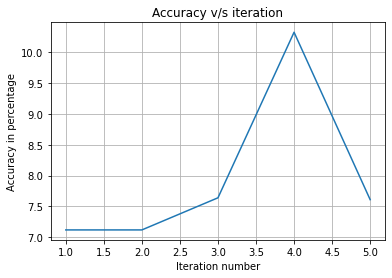



7.16% accuracy in iteration 1 for test data
7.16% accuracy in iteration 2 for test data
7.96% accuracy in iteration 3 for test data
10.81% accuracy in iteration 4 for test data
7.86% accuracy in iteration 5 for test data


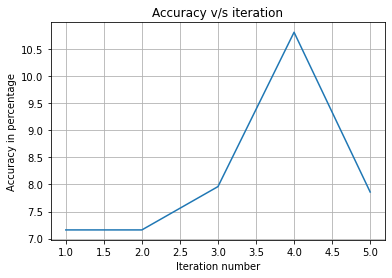

In [71]:
def accuracy_plotter(train_or_test, dimension):
    yvals = []
    xvals = []
    for i in range(M):
        xvals.append(i+1)
    
    Y1 = regressors[0].predict(data_dict[train_or_test + "_images"].reshape(dimension,784))
    count = 0
    for i in range(dimension):
        if(round(Y1[i]) == data_dict[train_or_test + "_labels"][i]):
            count += 1
    
    yvals.append(round(count*100/dimension, 2))
    print(yvals[0], "% accuracy in iteration 1 for ", train_or_test, " data", sep = "")
#     print(Y1)
    
    for j in range(1,M):
        Y1 = Y1 + (learning_rate*regressors[j].predict(data_dict[train_or_test + "_images"].reshape(dimension,784)))
        count = 0
        for i in range(dimension):
            if(round(Y1[i]) == data_dict[train_or_test + "_labels"][i]):
                count += 1
        yvals.append(round(count*100/dimension, 2))
        print(yvals[j], "% accuracy in iteration ", j+1," for ", train_or_test, " data", sep = "")
#         print(Y1)
        
    plt.plot(xvals,yvals)
    plt.title("Accuracy v/s iteration")
    plt.xlabel("Iteration number")
    plt.ylabel("Accuracy in percentage")
    plt.grid(True)
    plt.show()

accuracy_plotter("train", 60000)
print("\n")
accuracy_plotter("test", 10000)